In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns

In [98]:
# Load the data
df = pd.read_csv('../data/benin-malanville.csv')

In [85]:
# Basic stats (row count,std,mean, min, max,and the percentiles) for numeric columns.
df.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [86]:
#structural summary  for df.info() 
df.info()
#Additional summary of COLUMN WITH >5% missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values/len(df))*100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_summary = missing_summary[missing_summary['Percentage'] > 5]
#print the summary
print("Missing values",missing_summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [87]:
#FROM THE ABOVE WE CAN SEE THAT COMMENTS IS EMPTY FOR ALL THE ROWS(100% NULL) 
#AND THE COLUMN IS NOT NEEDED FOR OUR ANALYSIS THEREFORE WE DROP IT
df.drop(columns=['Comments'], inplace=True)
print("Shape after dropping:", df.shape)  # Should show (525600, 18) now

Shape after dropping: (525600, 18)


In [89]:
#check for duplicates
df.duplicated().sum() 

np.int64(0)

In [90]:
# Convert timestamp if needed
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Check time range and frequency
print("Date range:", df['Timestamp'].min(), "to", df['Timestamp'].max())
print("Time frequency:", pd.infer_freq(df['Timestamp']))
# Check if timestamp is properly converted
print(df['Timestamp'].dtype)  # Should show: dtype('<M8[ns]')



Date range: 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Time frequency: min
datetime64[ns]


In [92]:
#from df.discribe() we can see that the columns DHI, DNI, GHI, HAVE NEGATIVE VALUES WHICH IS NOT POSSIBLE
#THEREFORE WE CAN DROP THE ROWS WITH NEGATIVE VALUES
# Create a mask for negative values
mask = (df[['DHI', 'DNI', 'GHI']] < 0).any(axis=1)
# Drop rows with negative values
df[['GHI', 'DNI', 'DHI']] = df[['GHI', 'DNI', 'DHI']].clip(lower=0)


In [93]:
#find outliers using Z score >3
from scipy.stats import zscore

# 1) Pick your columns
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# 2) Compute Z-scores
z = df[cols].apply(zscore)

# 3) Flag outliers (|Z| > 3)
outliers = (z.abs() > 3)

# 4) Count how many outliers per column
outlier_counts = outliers.sum()
print("Outlier counts:\n", outlier_counts)

# 5) (Optional) See which rows have ANY outlier
bad_rows = df[outliers.any(axis=1)]
print("\nSample rows with at least one outlier:\n", bad_rows.head())


Outlier counts:
 GHI         90
DNI          2
DHI       3889
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64

Sample rows with at least one outlier:
               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670 2021-08-09 11:11:00   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671 2021-08-09 11:12:00  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672 2021-08-09 11:13:00   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673 2021-08-09 11:14:00   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674 2021-08-09 11:15:00  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   

      WS  WSgust  WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  \
670  3.2     4.1      0.7  190.5     18.4  999         0            0.0   
671  3.4     4.1      0.6  175.8     13.3  999         0            0.0   
672  3.4     4.6      0.9  171.5     11.9  999         0            0.0   
673  4.7     5.6      0.6  160.7      8.0  999         0     

In [96]:
# Investigate extreme DHI values
print(df[outliers['DHI']][['Timestamp','DHI','GHI','DNI']].describe())

# Physical sanity check: DHI should always be ≤ GHI
invalid_dhi = df[df['DHI'] > df['GHI']]
print(f"\nDHI > GHI cases: {len(invalid_dhi)}")

                           Timestamp          DHI          GHI          DNI
count                           3889  3889.000000  3889.000000  3889.000000
mean   2022-02-24 09:59:34.065312256   626.146619   802.809925   173.922705
min              2021-08-09 11:11:00   589.400000   598.200000     1.400000
25%              2022-02-21 13:58:00   602.900000   710.200000    67.800000
50%              2022-03-18 11:47:00   619.500000   796.200000   164.700000
75%              2022-04-10 12:16:00   644.300000   882.000000   258.600000
max              2022-08-08 12:38:00   759.200000  1352.000000   771.800000
std                              NaN    28.135503   117.329331   118.263802

DHI > GHI cases: 0


In [95]:
# Where DHI > GHI, cap DHI at 90% of GHI (since some diffuse light must exist)

df.loc[df['DHI'] > df['GHI'], 'DHI'] = df['GHI'] * 0.9

In [97]:
remaining_issues = df[df['DHI'] > df['GHI']]
print(remaining_issues[['GHI','DNI','DHI']].describe())

       GHI  DNI  DHI
count  0.0  0.0  0.0
mean   NaN  NaN  NaN
std    NaN  NaN  NaN
min    NaN  NaN  NaN
25%    NaN  NaN  NaN
50%    NaN  NaN  NaN
75%    NaN  NaN  NaN
max    NaN  NaN  NaN


Text(0, 0.5, 'W/m²')

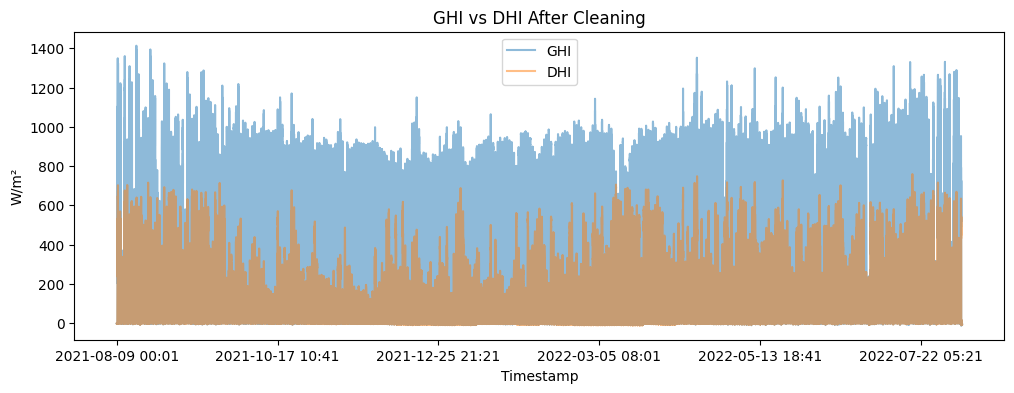

In [99]:
df.plot(x='Timestamp', y=['GHI','DHI'], figsize=(12,4), alpha=0.5)
plt.title('GHI vs DHI After Cleaning')
plt.ylabel('W/m²')

In [74]:
# Night should have GHI=0, DNI=0, DHI~0
night_mask = (df['GHI'] == 0)
print("Nighttime records:", night_mask.sum())

# Check if other sensors agree
print("DNI at night:", df.loc[night_mask, 'DNI'].describe())
print("DHI at night:", df.loc[night_mask, 'DHI'].describe())

Nighttime records: 259210
DNI at night: count    259210.000000
mean          0.000974
std           0.039045
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.900000
Name: DNI, dtype: float64
DHI at night: count    259210.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: DHI, dtype: float64
